In [1]:
import pandas as pd
import glob

#create a dataframe
name_df = pd.DataFrame()

#open, read all text files and name the column labels
for files in glob.glob('SSN_data/*.txt'):
    comb_data = pd.read_csv(files,names=['state', 'gender', 'year', 'name', 'count'])
#concatenate text files in the dataframe
    name_df = pd.concat([name_df,comb_data],axis=0,ignore_index=True)
name_df.head()

,state,gender,year,name,count
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


In [2]:
#groupby_df= name_df.groupby(["name"])
#groupby_df

In [3]:
#count_of_names = groupby_df["name"].count()
#count_of_names.head()

In [4]:
#female_ser = count_of_names.loc["1910"]
#female_ser

In [5]:
#female_pivot = female_ser.unstack()
#female_pivot

In [6]:
%pylab inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [7]:
#plt.figure(figsize=(51,51))
#pivot_table = female_pivot
#plt.xlabel("Names", size=15)
#plt.ylabel("States", size=15)
#plt.title("Names by Count")
#sns.heatmap(pivot_table, annot=True, fmt= ".1f", linewidths=.5, square = True, cmap= "Blues_r")

In [8]:
#count_of_names.unstack()

In [9]:
#count_of_names.unstack()

In [10]:
# bins

bins = [1909, 1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2018]
group_names = ["10s", "20s", "30s", "40s", "50s", "60s", "70s", "80s", "90s", "00s", "2010s"]

In [11]:
name_df["decades"] = pd.cut(name_df["year"], bins, labels=group_names)
name_df.head()

,state,gender,year,name,count,decades
0,AK,F,1910,Mary,14,10s
1,AK,F,1910,Annie,12,10s
2,AK,F,1910,Anna,10,10s
3,AK,F,1910,Margaret,8,10s
4,AK,F,1910,Helen,7,10s


In [12]:
cut_df = name_df.drop(('year'),axis=1)
cut_df.head(30)

,state,gender,name,count,decades
0,AK,F,Mary,14,10s
1,AK,F,Annie,12,10s
2,AK,F,Anna,10,10s
3,AK,F,Margaret,8,10s
4,AK,F,Helen,7,10s
5,AK,F,Elsie,6,10s
6,AK,F,Lucy,6,10s
7,AK,F,Dorothy,5,10s
8,AK,F,Mary,12,10s
9,AK,F,Margaret,7,10s


In [13]:
# check if there's many rows
#cut_df.loc[(cut_df['state']== 'AK') & (cut_df['name'] == 'Mary')].head(20)

In [14]:
#df.groupby('id')['value'].nlargest(2).sum(level=0).nlargest(2)

In [15]:
grouped_df = cut_df.groupby(["decades","gender","name"])

In [21]:
sum_df = grouped_df["name"].count()
sum_df

decades  gender  name      
10s      F       Abbie          86
                 Abigail         3
                 Ada           413
                 Adah           14
                 Adaline        24
                 Adda            4
                 Addie         203
                 Adel            3
                 Adela          52
                 Adelaida        8
                 Adelaide      196
                 Adele         251
                 Adelene         1
                 Adelfa          2
                 Adelia         25
                 Adelina        39
                 Adeline       303
                 Adell          88
                 Adella         55
                 Adelle         44
                 Adelyn          2
                 Adline          5
                 Adriana         1
                 Adrienne       41
                 Afton          20
                 Agapita         3
                 Agatha        127
                 Aggie     

In [25]:
sum_df.loc["00s","F", "Helen"]

370

In [20]:
sum_df.loc[:,"F"]
top_100_female = sum_df.loc[:,"F"].nlargest(1000)
top_100_female

decades  name     
10s      Helen        510
         Mary         510
20s      Margaret     510
         Mary         510
30s      Margaret     510
         Mary         510
40s      Barbara      510
         Carol        510
         Dorothy      510
         Judith       510
         Margaret     510
         Mary         510
         Nancy        510
         Patricia     510
50s      Barbara      510
         Brenda       510
         Carol        510
         Catherine    510
         Cheryl       510
         Christine    510
         Cynthia      510
         Deborah      510
         Diane        510
         Donna        510
         Elizabeth    510
         Janet        510
         Janice       510
         Judy         510
         Karen        510
         Katherine    510
                     ... 
40s      Marlene      476
50s      Irene        476
60s      Betty        476
         Joann        476
         Sally        476
70s      Marie        476
80s      Abigail   

In [18]:
top_100_female_pivot = top_100_female.unstack(fill_value=0)
top_100_female_pivot

name,Helen,Mary,Margaret,Barbara,Carol,Dorothy,Judith,Nancy,Patricia,Brenda,...,Theresa,Tina,Tracy,Valerie,Wendy,Amy,Andrea,Angela,Carrie,Christina
decades,,,,,,,,,,,,,,,,,,,,,
10s,510,510,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20s,0,510,510,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30s,0,510,510,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40s,0,510,510,510,510,510,510,510,510,0,...,0,0,0,0,0,0,0,0,0,0
50s,0,510,510,510,510,0,0,510,510,510,...,0,0,0,0,0,0,0,0,0,0
60s,0,510,510,510,510,0,0,510,510,510,...,510,510,510,510,510,0,0,0,0,0
70s,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,510,510,510,510,510


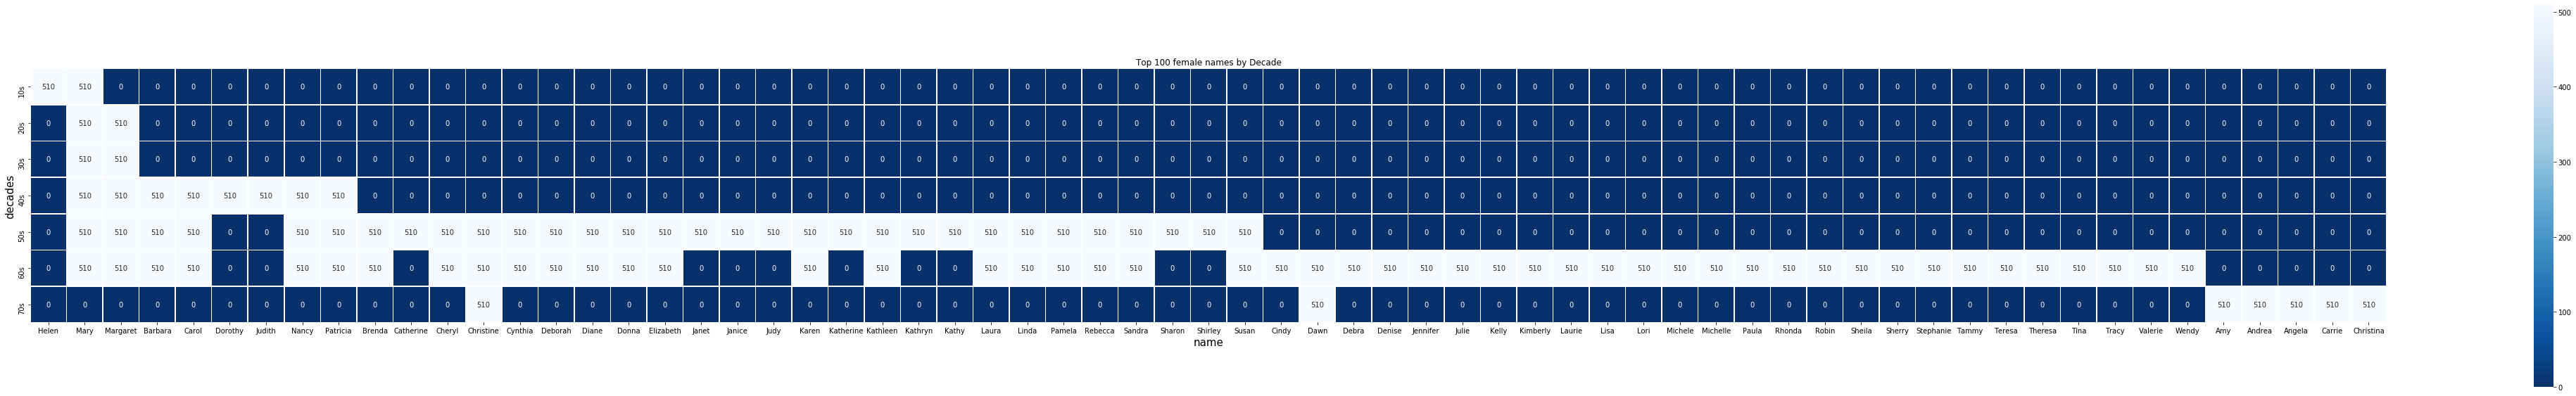

In [19]:
plt.figure(figsize=(75,10))
pivot_table = top_100_female_pivot
plt.xlabel("Names", size=15)
plt.ylabel("Decades", size=15)
plt.title("Top 100 female names by Decade")
sns.heatmap(pivot_table, annot=True, fmt= "d", linewidths=.5, square = True, cmap= "Blues_r")

In [8]:
#sum_df.loc[["10s", "20s", "30s", "40s", "50s", "60s", "70s", "80s", "90", "00s" "2010s"],"AK"].nlargest(120)

In [43]:
final_df = pd.DataFrame(sum_df).sort_values(by=["decades", 'state','gender','count'], ascending=[True, True,True, False])
final_df

count
decades state gender name            
10s     AK    F      Mary         189
                     Margaret      92
                     Helen         89
                     Annie         53
                     Anna          52
                     Ruth          52
                     Alice         51
                     Dorothy       48
                     Elizabeth     42
                     Frances       34
                     Marie         32
                     Martha        31
                     Agnes         24
                     Julia         23
                     Louise        23
                     Clara         22
                     Elsie         19
                     Emma          17
                     Katherine     16
                     Virginia      16
                     Esther        15
                     Jean          12
                     Betty         11
                     Lillian       11
                     Lucy          11
                     Evelyn        10
                     Florence      10
                     Minnie        10
                     Pauline       10
                     Vera          10
...                               ...
2010s   WY    M      Ellis          5
                     Emerson        5
                     Emilio         5
                     Finley         5
                     Ivan           5
                     Javier         5
                     Jeffrey        5
                     Judah          5
                     Julius         5
                     Kaison         5
                     Kason          5
                     Kellan         5
                     Kellen         5
                     Kyson          5
                     Manuel         5
                     Matthias       5
                     Morgan         5
                     Orion          5
                     Paul           5
                     Payton         5
                     Quentin        5
                     Rayden         5
                     Raymond        5
                     Russell        5
                     Sean           5
                     Teegan         5
                     Trace          5
                     Troy           5
                     Tyce           5
                     Zayne          5

[1069222 rows x 1 columns]

In [10]:
final = final_df.loc[("10s", "AK", ["F","M"]), :].nlargest(10,"count")
final

count
decades state gender name           
10s     AK    M      John        194
              F      Mary        189
              M      William     130
                     James       103
              F      Margaret     92
              M      George       92
              F      Helen        89
              M      Robert       83
                     Charles      61
              F      Annie        53

In [11]:
finaldf = final.reset_index()
finaldf

,decades,state,gender,name,count
0,10s,AK,M,John,194
1,10s,AK,F,Mary,189
2,10s,AK,M,William,130
3,10s,AK,M,James,103
4,10s,AK,F,Margaret,92
5,10s,AK,M,George,92
6,10s,AK,F,Helen,89
7,10s,AK,M,Robert,83
8,10s,AK,M,Charles,61
9,10s,AK,F,Annie,53


In [49]:
clean_df = final_df.reset_index()
clean_df.head(4)

,decades,state,gender,name,count
0,10s,AK,F,Mary,189
1,10s,AK,F,Margaret,92
2,10s,AK,F,Helen,89
3,10s,AK,F,Annie,53


In [52]:
i = 0
for index, row in clean_df.iterrows():
    i+=1
print(i)

    

1069222


In [ ]:
import folium

In [ ]:
df = pd.read_excel('Latitude Longitude for each state.xlsx')
df.head()

In [ ]:
merge_table = pd.merge(df, clean_df, on="state")
merge_table

In [ ]:
revised_merge_table = merge_table.drop(('State (full name)'),axis=1)
revised_merge_table.head()

In [ ]:
df = revised_merge_table.groupby(["state", "name", "gender"])
df.head()

In [ ]:
revised_merge_table.to_csv("name_and_coordinates.csv",index=False)

In [ ]:
m = folium.Map(location=[40, -102], tiles='https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', attr='&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors', zoom_start="3.0")
